In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import timing
import astropy.io.fits as pf
import scipy.fftpack as sci
import doppler
import mpl_toolkits
from airPLS import airPLS
%matplotlib notebook

<IPython.core.display.Javascript object>


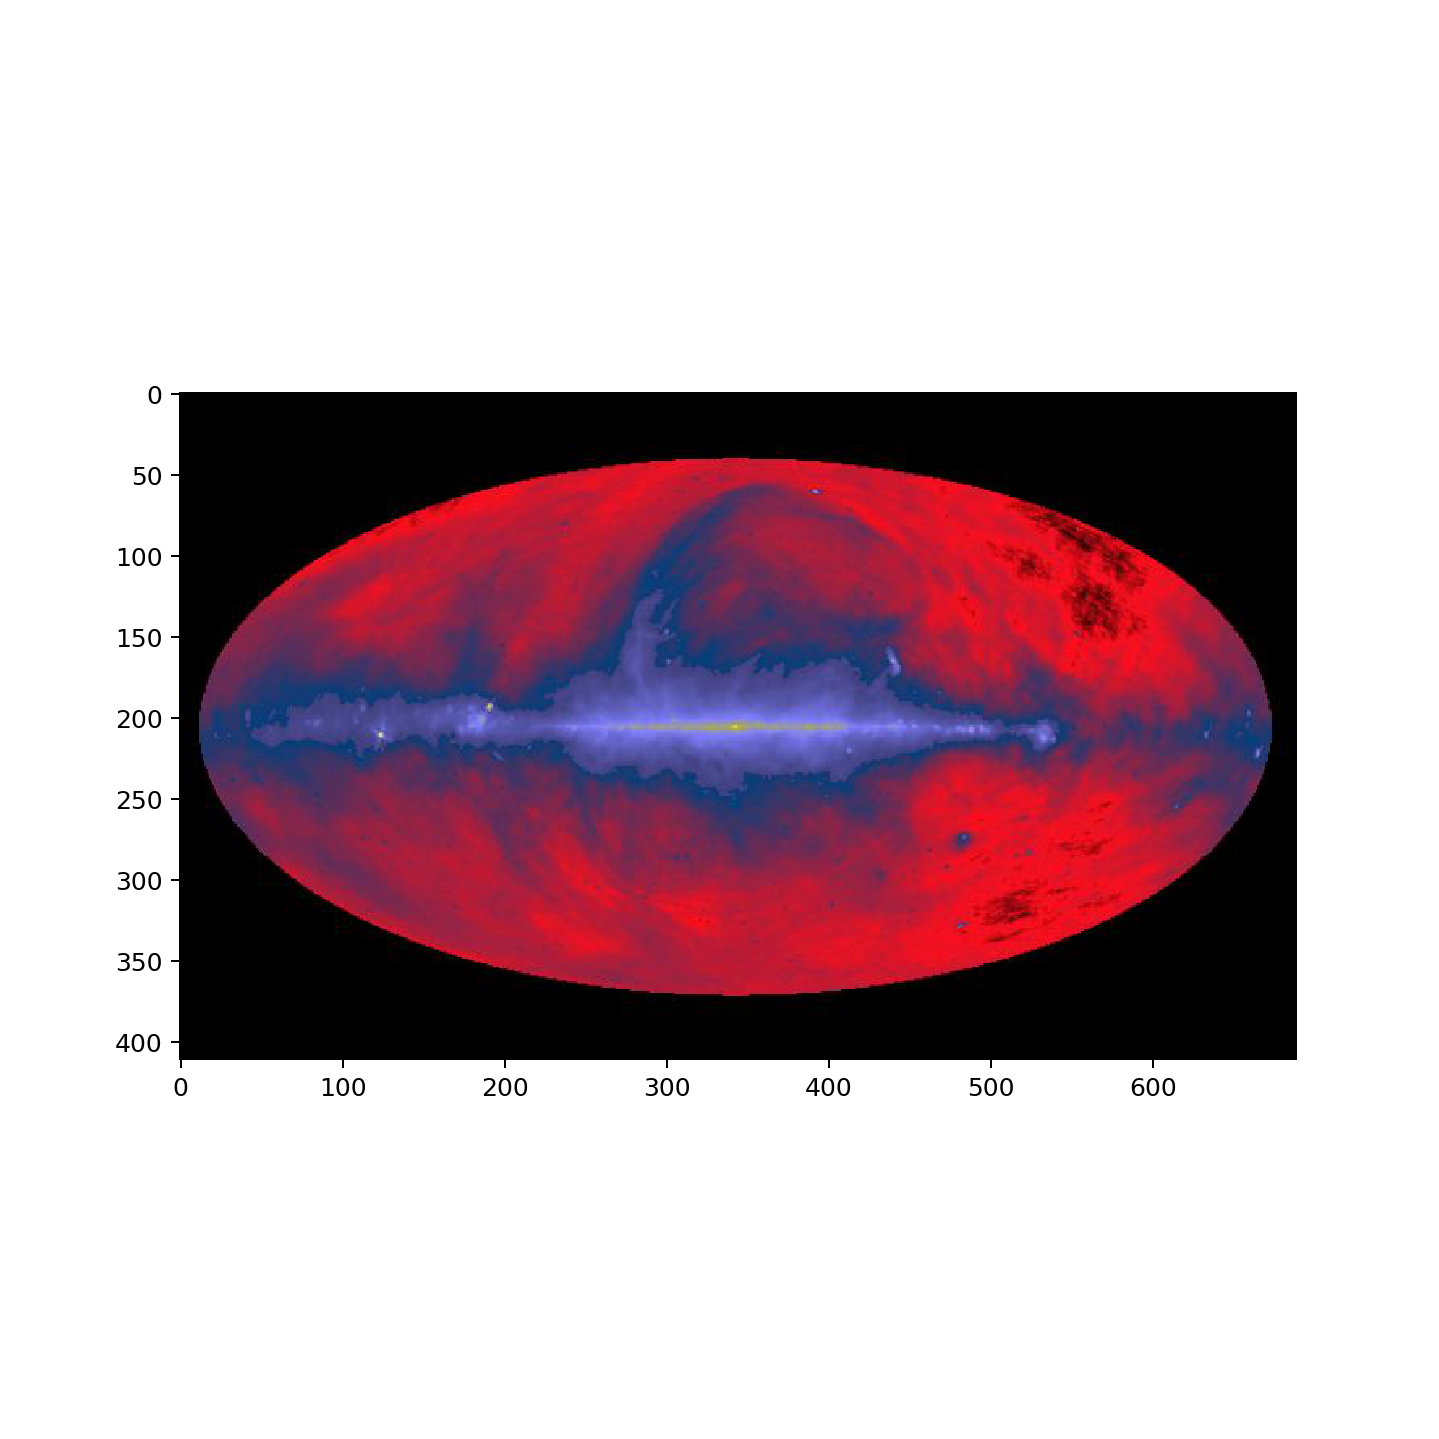

In [21]:
import matplotlib.image as mpimg
plt.figure(figsize=(8,8))
img = mpimg.imread('408_allsky.jpg')
plt.imshow(img)
plt.show()

In [7]:
def convert_galactic1950_to_ra_dec(l,b): 
    x0 = np.cos(np.radians(b))*np.cos(np.radians(l))
    x1 = np.cos(np.radians(b))*np.sin(np.radians(l))
    x2 = np.sin(np.radians(b))

    R = np.matrix([[-0.066989,-0.872756,-0.483539],[0.492728,-0.450347,0.744585],[-0.867601,-0.188375,0.460200]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ra =  float(np.degrees(np.arctan2(xp[1],xp[0])))
    dec = float(np.degrees(np.arcsin(xp[2])))

    return ra, dec
def convert_ra_dec_to_galactic1950(ra,dec): 
    x0 = np.cos(np.radians(dec))*np.cos(np.radians(ra))
    x1 = np.cos(np.radians(dec))*np.sin(np.radians(ra))
    x2 = np.sin(np.radians(dec))

    R = np.matrix([[-0.066989,-0.872756,-0.483539],[0.492728,-0.450347,0.744585],[-0.867601,-0.188375,0.460200]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(R,x)

    l = float(np.degrees(np.arctan2(xp[1],xp[0])))
    b = float(np.degrees(np.arcsin(xp[2])))

    return l ,b
def convert_ra_dec_to_az_alt(ra,dec,LST,phi):
    x0 = np.cos(np.radians(dec))*np.cos(np.radians(ra))
    x1 = np.cos(np.radians(dec))*np.sin(np.radians(ra))
    x2 = np.sin(np.radians(dec))

    R0 = np.matrix([[np.cos(np.radians(LST)),np.sin(np.radians(LST)),0],[np.sin(np.radians(LST)),-np.cos(np.radians(LST)),0],[0,0,1]])
    R1 = np.matrix([[-np.sin(np.radians(phi)),0,np.cos(np.radians(phi))],[0,-1,0],[np.cos(np.radians(phi)),0,np.sin(np.radians(phi))]])



    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(R1,np.dot(R0,x))

    az =  float(np.degrees(np.arctan2(xp[1],xp[0])))
    alt = float(np.degrees(np.arcsin(xp[2])))

    return az, alt



In [8]:
targetsRA = np.load('NPS_coord_ra_dec.npz')['arr_0']
targetsDEC =  np.load('NPS_coord_ra_dec.npz')['arr_1']

In [9]:
RAs = np.array([])
DECs = np.array([])
JDs = np.array([])
for i in np.arange(9):
    lol1 = 'spurs\data00' + str(int(i)+1) + '.fits'
    data1 = pf.getdata(lol1)
    header1 = pf.getheader(lol1)
    RAs = np.append(RAs, header1['RA'])
    DECs = np.append(DECs, header1['DEC'])
    JDs = np.append(JDs, header1['JD'])
    
for i in np.linspace(10,99,90):
    lol2 = 'spurs\data0' + str(int(i)) + '.fits'
    data2 = pf.getdata(lol2)
    header2 = pf.getheader(lol2)
    RAs = np.append(RAs, header2['RA'])
    DECs = np.append(DECs, header2['DEC'])
    JDs = np.append(JDs, header2['JD'])
    
for i in np.linspace(100,165,66):
    lol3 = 'spurs\data' + str(int(i)) + '.fits'
    data3 = pf.getdata(lol3)
    header3 = pf.getheader(lol3)
    RAs = np.append(RAs, header3['RA'])
    DECs = np.append(DECs, header3['DEC'])
    JDs = np.append(JDs, header3['JD'])

<IPython.core.display.Javascript object>


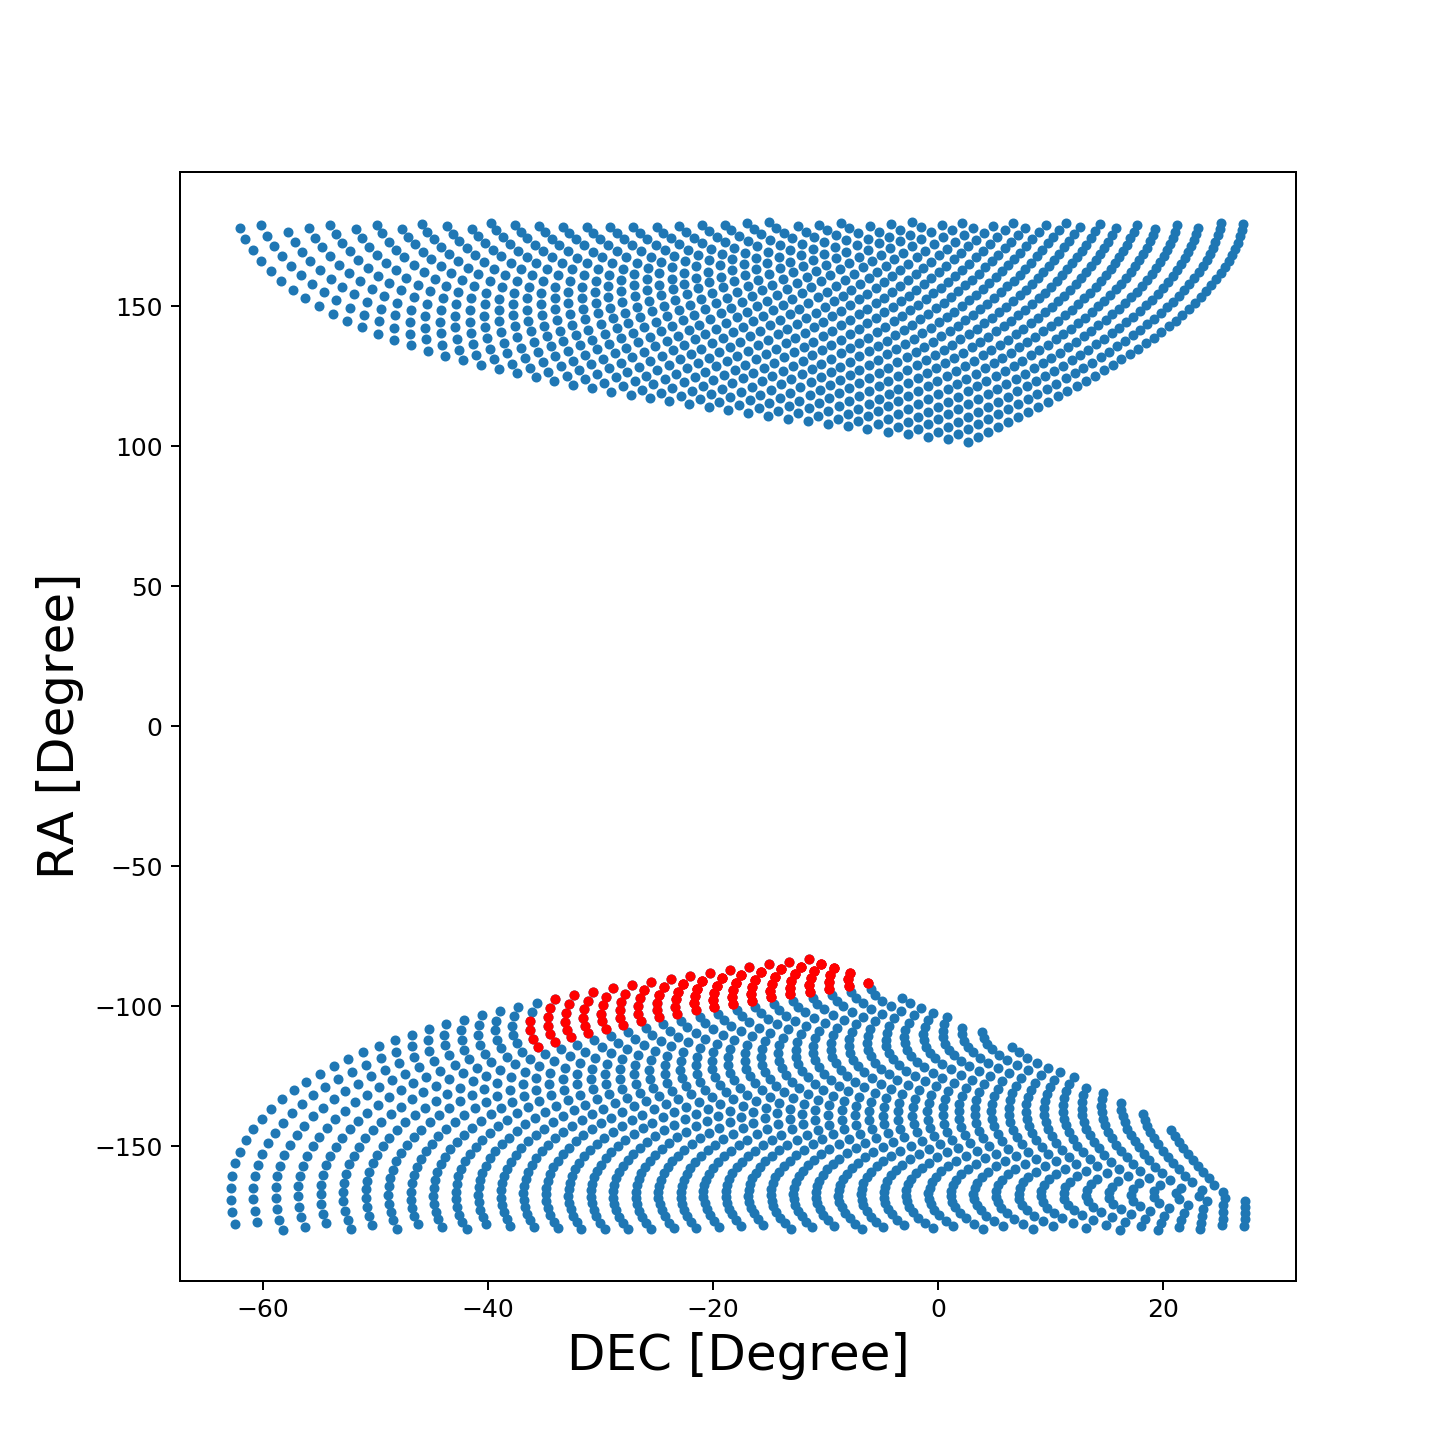

(165,)


In [27]:
plt.figure(figsize=(8,8))
plt.plot(targetsDEC, targetsRA, '.')
plt.plot(DECs,RAs, 'r.')
plt.xlabel('DEC [Degree]',fontsize=20)
plt.ylabel('RA [Degree]',fontsize=20)
plt.show()
print(RAs.shape)

In [11]:
############################### RA DEC to GALACTIC #################
gal_l = np.array([])
gal_b = np.array([])
for i in np.arange(len(RAs)):
    l, b = convert_ra_dec_to_galactic1950(RAs[i], DECs[i])
    gal_l = np.append(gal_l, l)
    gal_b = np.append(gal_b, b)
    
plt.plot(gal_b,gal_l, '.')
plt.xlabel('Galactic Longitude [Degree]')
plt.ylabel('Galactic Latitude [Degree]')
plt.show()

In [12]:
print(gal_l[0], gal_l[1])
print(np.abs(gal_l[0] - gal_l[1]))
print(gal_l[0],gal_l[15])

plt.plot(gal_l, gal_b, '.')

-5.653394205386857 -3.653291825197708
2.0001023801891495
-5.653394205386857 -5.5611907487000245


In [14]:

jesus = np.array([])
christ = np.array([])
for i in np.arange(len(gal_l)):
    damn = gal_l[i]
    damn2 = gal_b[i]
    for j in np.arange(len(gal_l)):
        gg = gal_l[j]
        gg2 = gal_b[j]
        diff = damn - gg
        diff2 = damn2 - gg2
        if diff == 0:
            print(i,j)
            
            
#         if diff <= 0.00001:
            #print(j)
#         if np.abs(diff2) < 0.00001 and np.abs(diff) < 0.00001:
#             print(i,j) 

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
19 101
20 20
20 102
21 21
21 103
21 149
22 22
22 104
22 150
23 23
23 105
23 151
24 24
24 106
24 152
25 25
25 107
25 153
26 26
26 108
26 154
27 27
27 109
27 155
28 28
28 110
28 156
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
36 111
37 37
37 112
38 38
38 113
38 157
39 39
39 114
39 158
40 40
40 115
40 159
41 41
41 116
41 160
42 42
42 117
42 161
43 43
43 118
43 162
44 44
44 119
44 163
45 45
45 120
45 164
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
54 121
55 55
55 122
56 56
56 123
57 57
57 124
58 58
58 125
59 59
59 126
60 60
60 127
61 61
61 128
62 62
62 129
63 63
63 130
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
73 131
74 74
74 132
75 75
75 133
76 76
76 134
77 77
77 135
78 78
78 136
79 79
79 137
80 80
80 138
81 81
81 139
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
92 140
93 93
93 141
94 94
94 142
95 95
95 143
96 96
96 144
97 97
97 145
98 98

In [15]:
################################## FIRST FILE ###########################################

test ='spurs\data001.fits'
testd = pf.getdata(test)
testh = pf.getheader(test)
testo = pf.open(test)
for key in testh:
    print(key + ": ", testh[key])
    
testavg = np.zeros(len(testd))

for i in np.arange(10):
    specs = testo[i+1].data['auto0_real']
    testavg = testavg + specs
    
testavg = testavg/10
testavg = testavg[2:-10]
testavg = testavg - np.mean(testavg)


SIMPLE:  True
BITPIX:  8
NAXIS:  0
EXTEND:  True
NSPEC:  10
BOFFILE:  spec_ds8_8192.bof
MODE:  spec
FPGA:  192000000.0
IADC:  768000000.0
DOWNSAMP:  8
SAMPRATE:  24000000.0
BW:  12000000.0
NCHAN:  8192
RES:  1464.84375
FFTSHIFT:  16383
ACCLEN:  134217728
INTTIME:  0.6990506666666667
SCALE:  0
L:  353.8728779054326
B:  0.2165433324204383
RA:  -97.36193100940811
DEC:  -34.00500921143307
JD:  2458224.944398148
UTC:  2018/04/16 10:39:56
TIME:  1523875196.082099


<IPython.core.display.Javascript object>


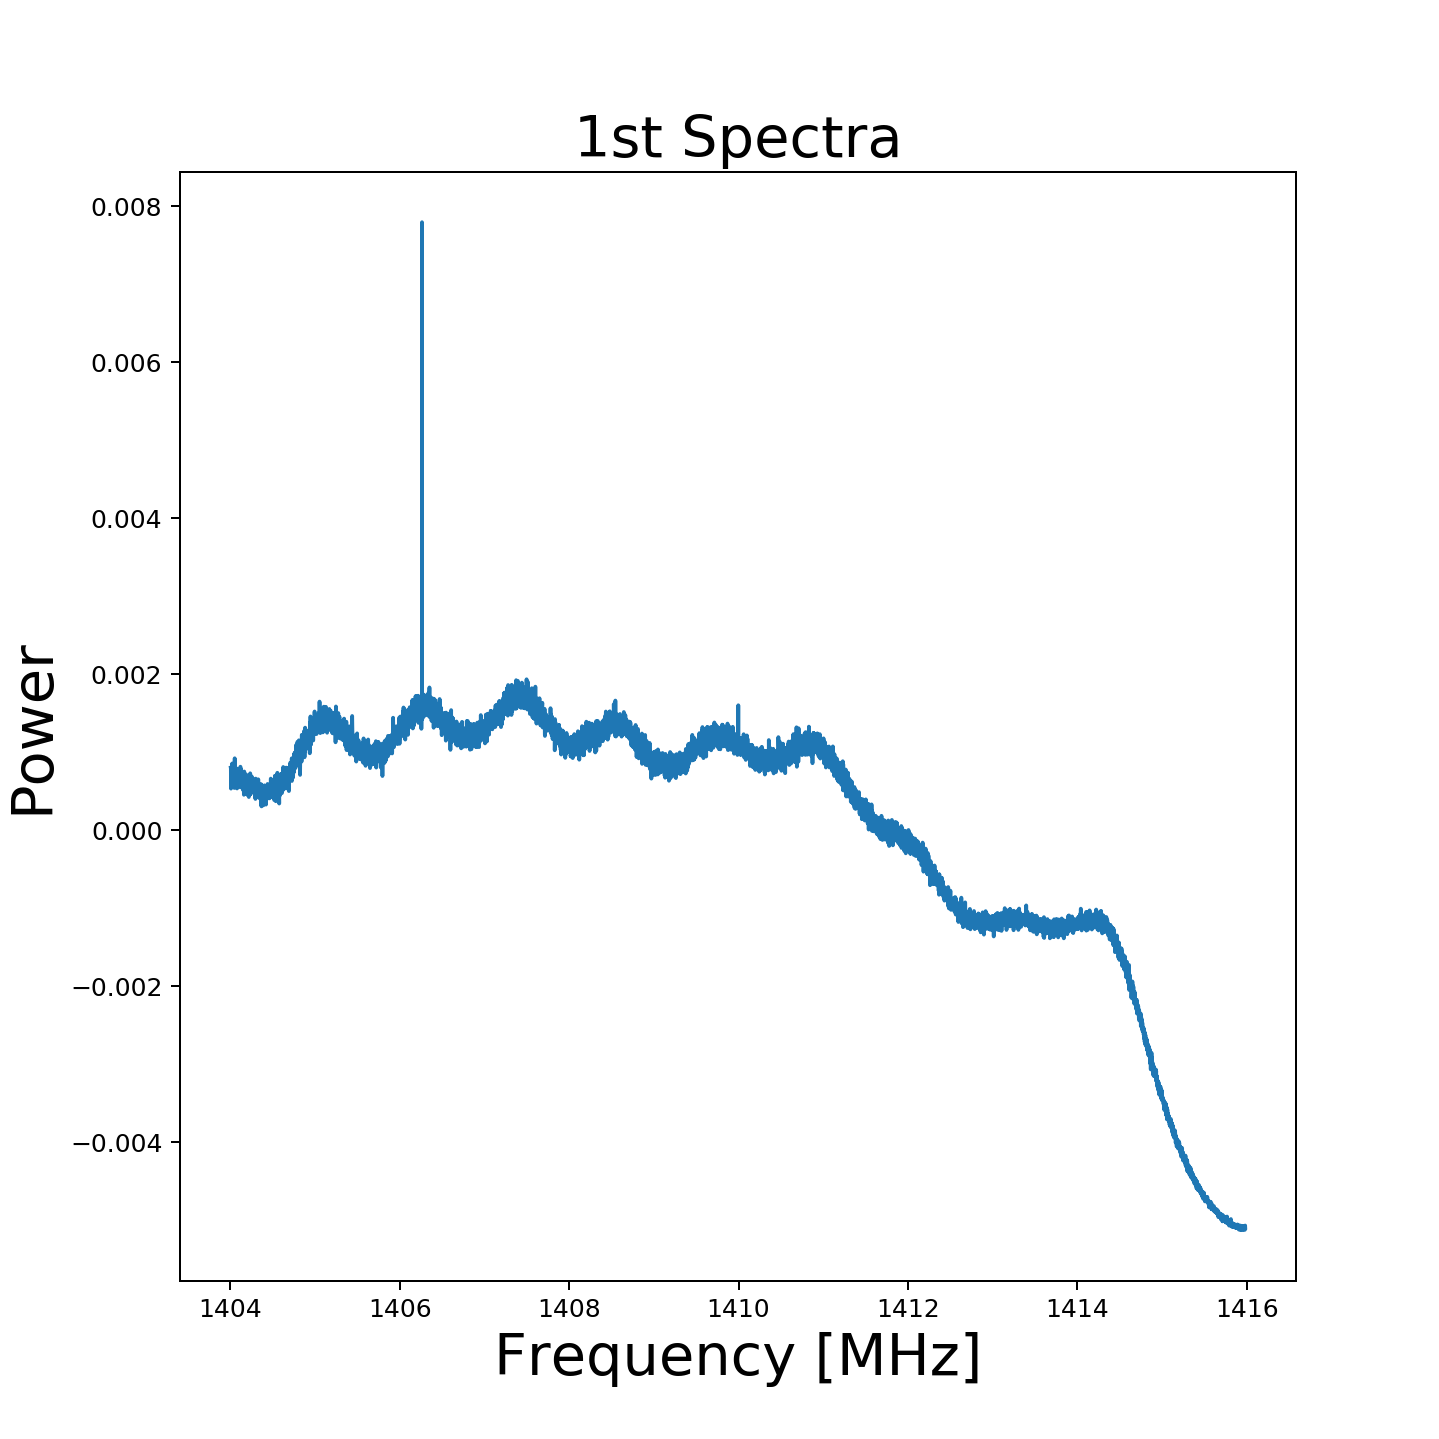

In [18]:
from astropy import units as u
res = testh['RES']
nchan = testh['NCHAN']

LO = 630


freqs = (np.arange(nchan) * res*u.Hz + 2 * LO * u.MHz + 144 * u.MHz).to(u.MHz).value[2:-10]


plt.figure(figsize=(8,8))
plt.plot(freqs,testavg)
plt.xlabel('Frequency [MHz]',fontsize=23)
plt.ylabel('Power',fontsize=23)
plt.title('1st Spectra',fontsize=23)
plt.show()

In [17]:
v = np.array([]) #km/s
for i in np.arange(len(RAs)):
    dv = doppler.get_projected_velocity(RAs[i],DECs[i],JDs[i])/1000
    v = np.append(v, dv) 

<IPython.core.display.Javascript object>


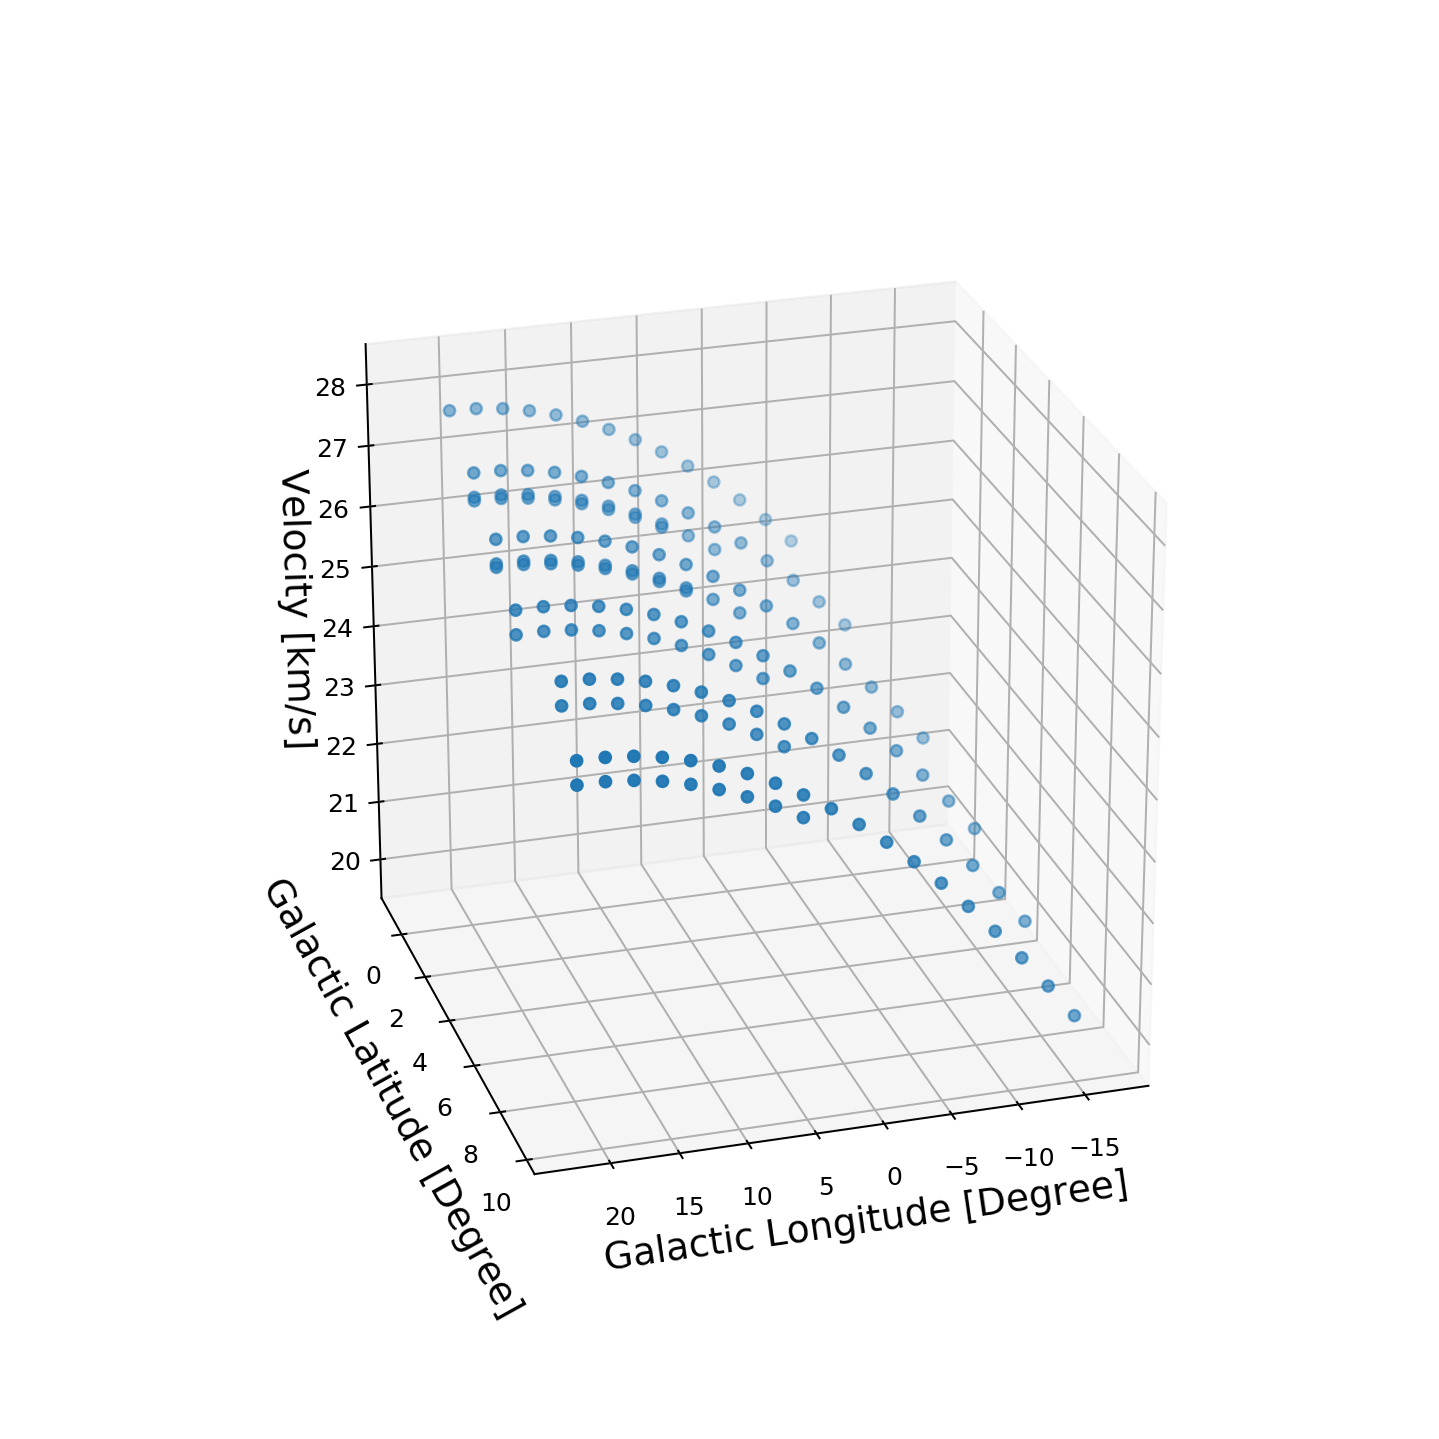

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(gal_l,gal_b, v, '.')
ax.set_xlabel('Galactic Longitude [Degree]', fontsize=15)
ax.set_ylabel('Galactic Latitude [Degree]', fontsize=15)
ax.set_zlabel('Velocity [km/s]', fontsize=15)
plt.show()

SIMPLE:  True
BITPIX:  8
NAXIS:  0
EXTEND:  True
NSPEC:  50
BOFFILE:  spec_ds8_8192.bof
MODE:  spec
FPGA:  192000000.0
IADC:  768000000.0
DOWNSAMP:  8
SAMPRATE:  24000000.0
BW:  12000000.0
NCHAN:  8192
RES:  1464.84375
FFTSHIFT:  16383
ACCLEN:  134217728
INTTIME:  0.6990506666666667
SCALE:  0
L:  119.8729085006556
B:  -0.088720613798643
RA:  6.450800828271027
DEC:  62.72570222965587
JD:  2458219.168645833
UTC:  2018/04/10 16:02:51
TIME:  1523376171.653885


<IPython.core.display.Javascript object>


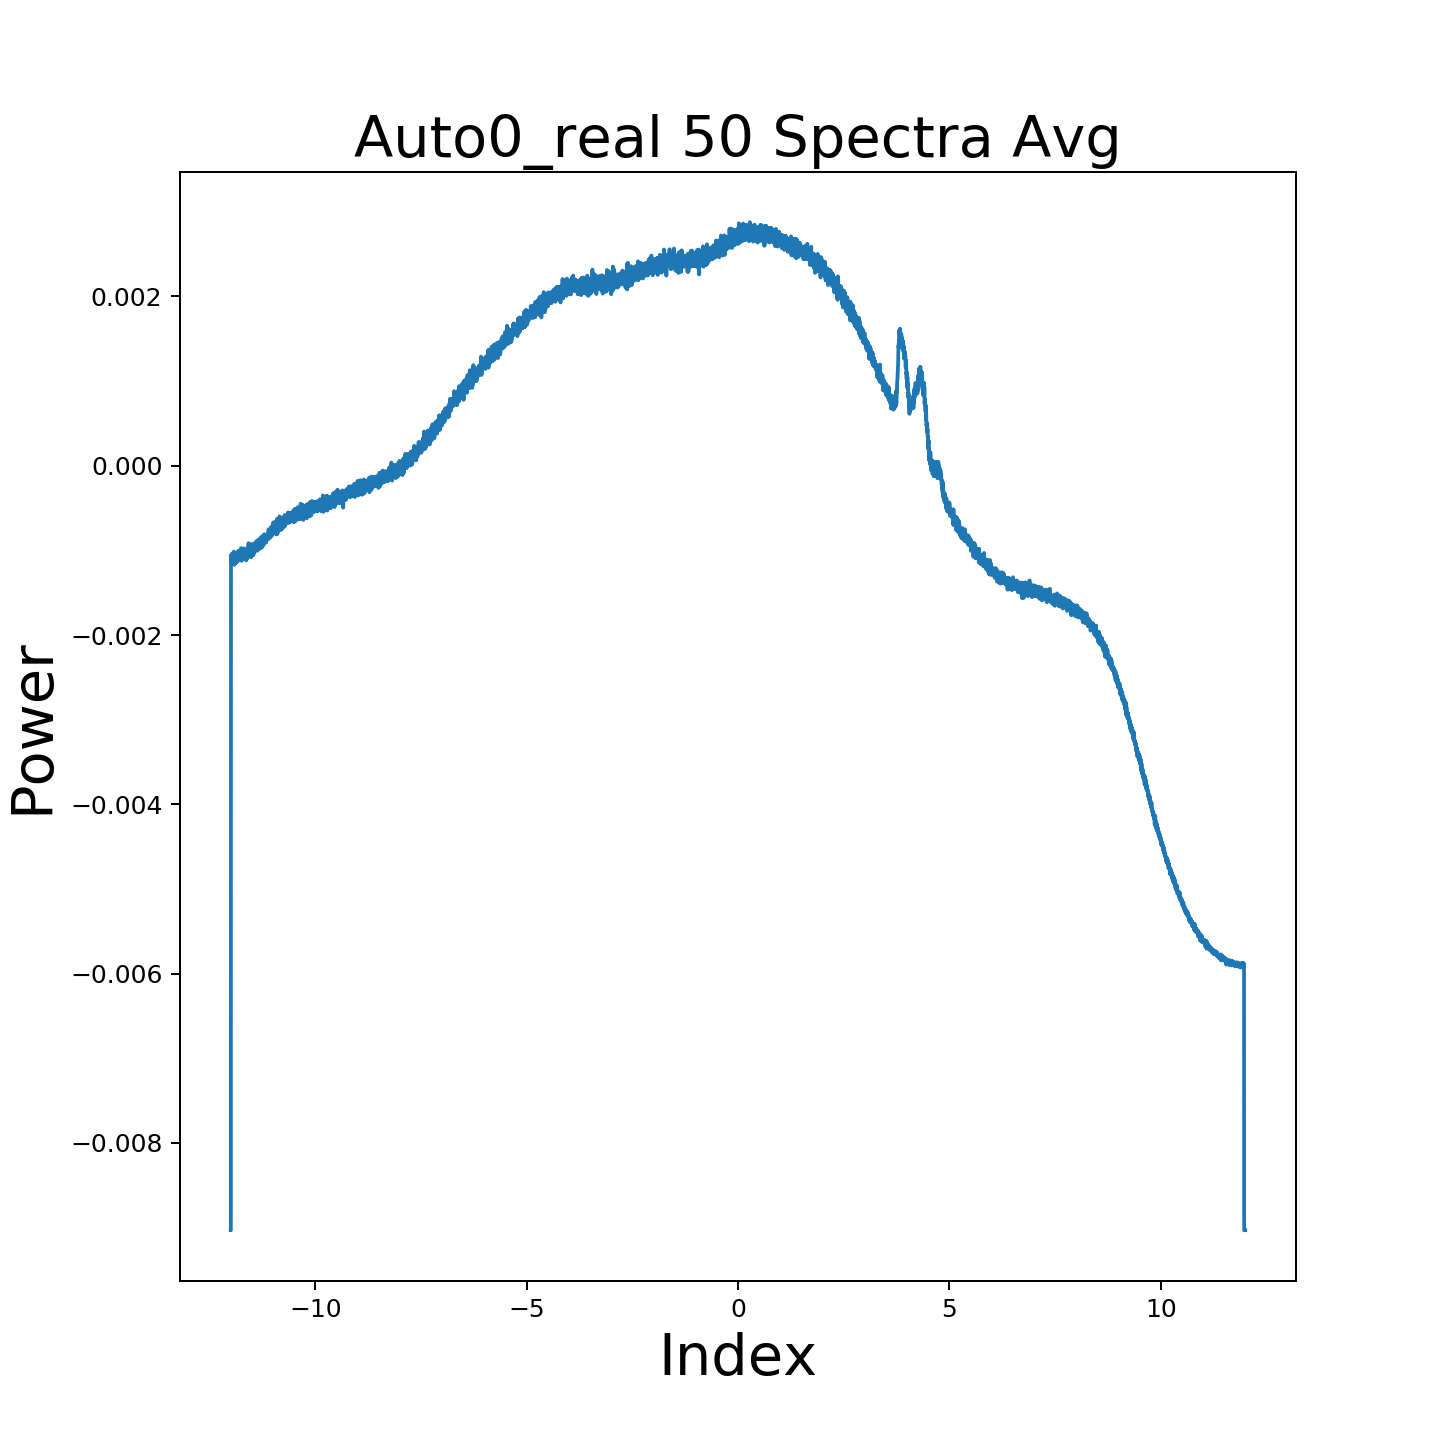

In [24]:
file ='1523376166.71_6.45080082827_62.7257022297.fits'
data = pf.getdata(file)
header = pf.getheader(file)
lol = pf.open(file)
for key in header:
    print(key + ": ", header[key])
    

avgspec0 = np.zeros(len(data))
for i in np.arange(50):
    specs = lol[i+1].data['auto0_real']
    avgspec0 = avgspec0 + specs
    
avgspec0 = avgspec0/50
avgspec0 = avgspec0 - np.mean(avgspec0)

vsamp = 24 #MHZ
N = len(avgspec0)

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)

plt.figure(figsize=(8,8))
plt.plot(f ,avgspec0)
plt.xlabel('Index',fontsize=23)
plt.ylabel('Power',fontsize=23)
plt.title('Auto0_real 50 Spectra Avg',fontsize=23)
plt.show()

<IPython.core.display.Javascript object>


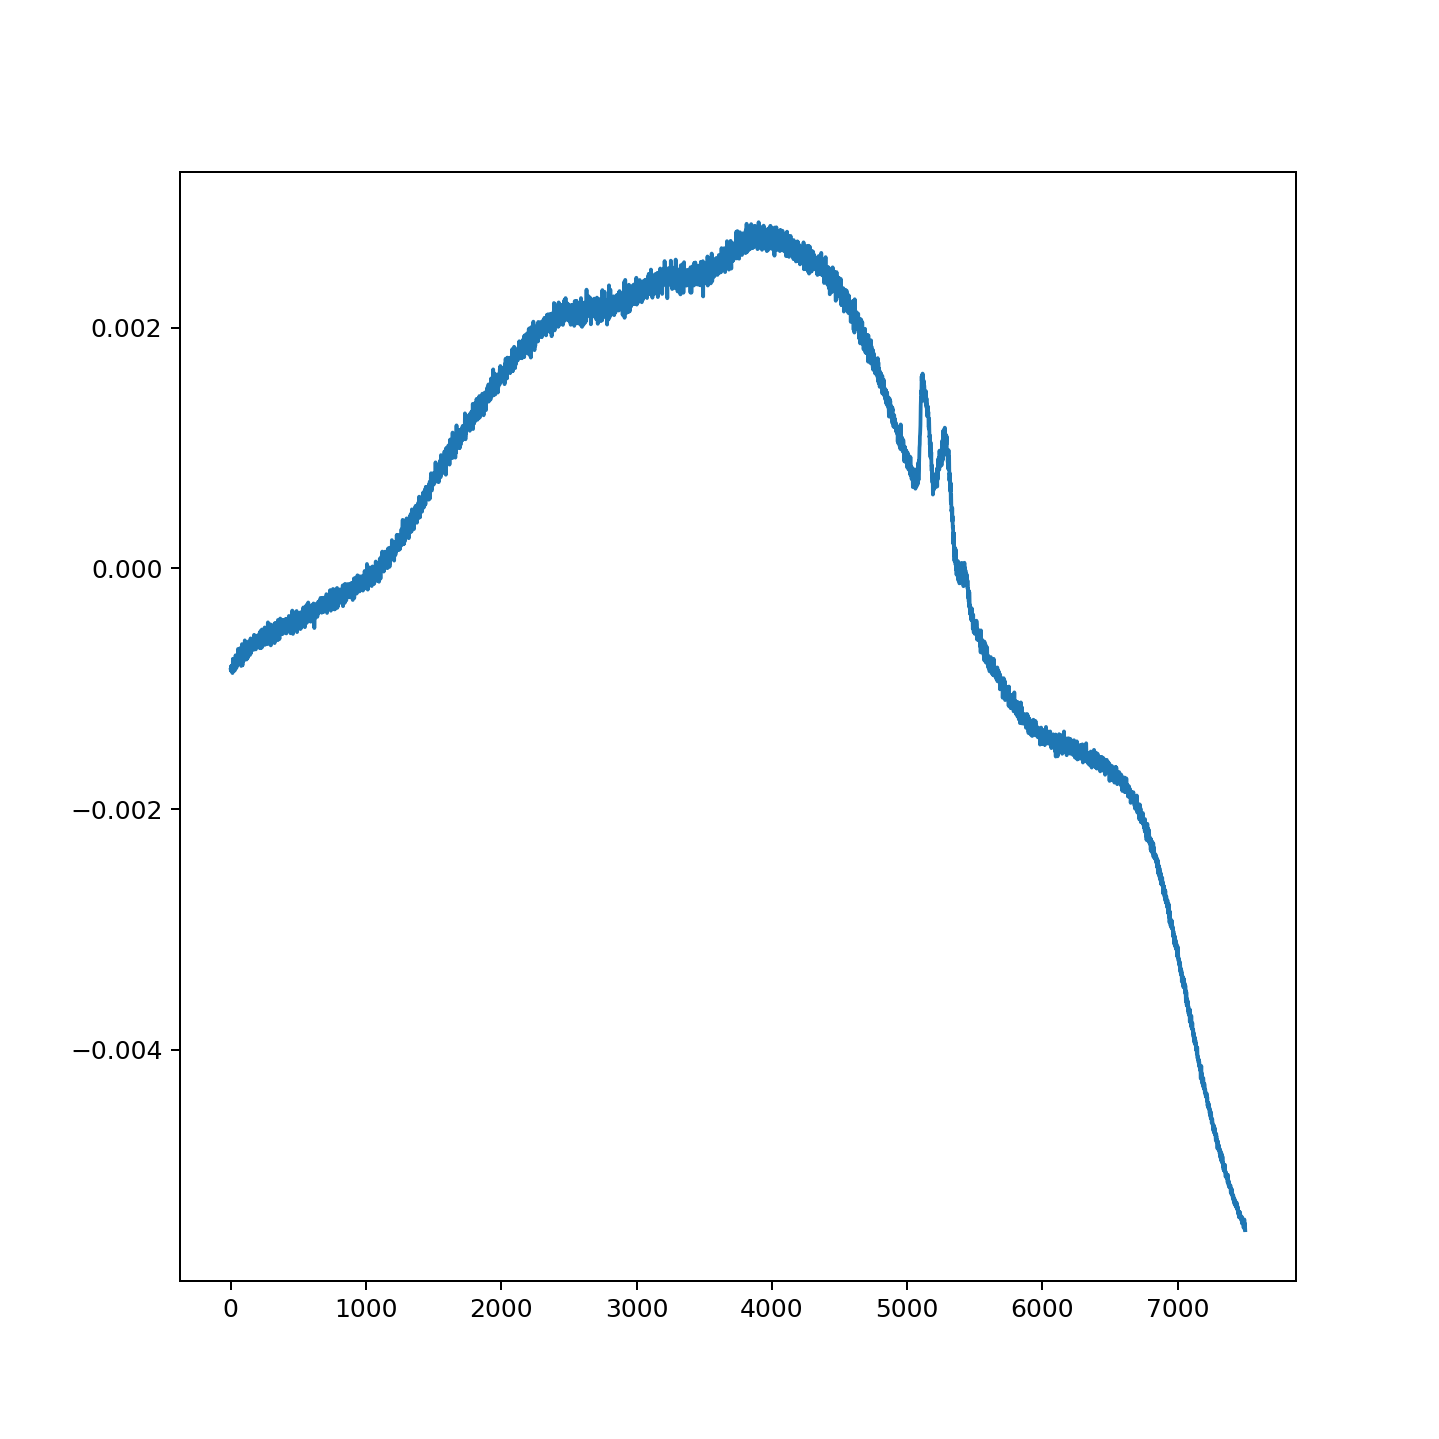

150.0


In [26]:
plt.figure(figsize=(8,8))
slice1 = avgspec0[290:7800]
R = len(slice1)%50 
slice1 = slice1[:-R]
print(7500/50)
plt.plot(slice1)
plt.show()

In [ ]:

cv = airPLS(slice1)
sub = slice1 - cv

f = np.fft.fftfreq(len(sub), 24)

plt.figure(figsize=(15,10))
plt.plot(np.fft.fftshift(f),sub)